In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def cargarData():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    #data = pd.read_excel('C:/Users/Usuario/Desktop/iris.xlsx', sheet_name='iris')
    data = data[:100]    
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype='float64') #Que hace este codigo?
    return data
 

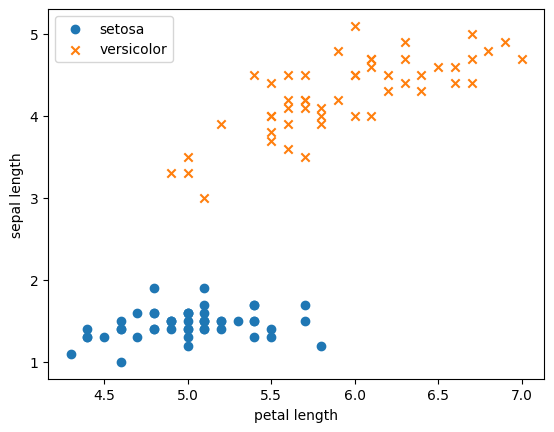

In [3]:
data = cargarData()
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [4]:
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, features.shape[1]+1))
    
    error = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label.item(0,0) - target)
            
            if(delta): # error
                misclassified += 1
                w += (delta * x)
        
        error.append(misclassified)
    return (w, error)

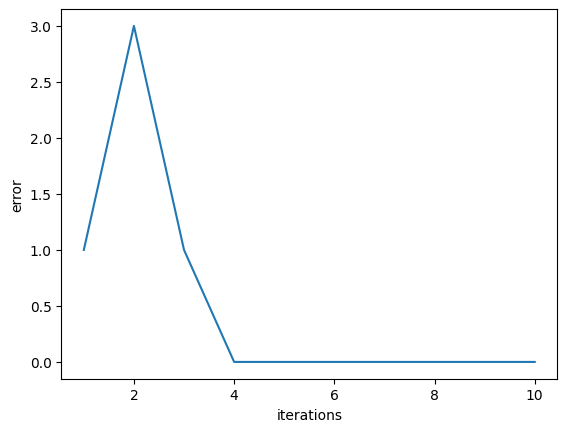

In [5]:
num_iter = 10
w, error = perceptron(data, num_iter)
w, error

epochs = np.arange(1, num_iter+1)
plt.plot(epochs, error)
plt.xlabel('iterations')
plt.ylabel('error')
plt.show()

In [6]:
def predecir(w, x):
    x = np.insert(x, 0, 1)  # Agregar sesgo
    print(x)
    y = np.dot(w, x)
    return 1 if y > 0 else 0

# Entrenar el Perceptrón
num_iter = 10
w, misclassified_ = perceptron(data, num_iter)

# Ejemplo de predicción
nuevo_vector = np.array([7.0,3.2,4.7,1.4])  # Longitud de sépalo y pétalo
prediccion = predecir(w, nuevo_vector)
print("Predicción:", prediccion) 

[1.  7.  3.2 4.7 1.4]
Predicción: 1
